In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [ ]:
# Load the dataset
file_path = "data.xlsx"
df = pd.read_excel(file_path)

# Clean column names (remove spaces if any)
df.columns = df.columns.str.replace(" ", "_")

# Drop columns 'Drug' and 'Disease'
df = df.drop(columns=['Drug_', 'Disease'], errors='ignore')

# Define target and features
y = df['MW']
X = df.drop(columns=['MW'])

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

  Feature  Importance
2   ReZG3    0.162094
5     IN2    0.137710
1      M1    0.127199
0       R    0.127092
4     IN1    0.122548
7      QG    0.116165
6      GQ    0.104367
3       N    0.102827


<ipython-input-10-88a4ec81cdef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


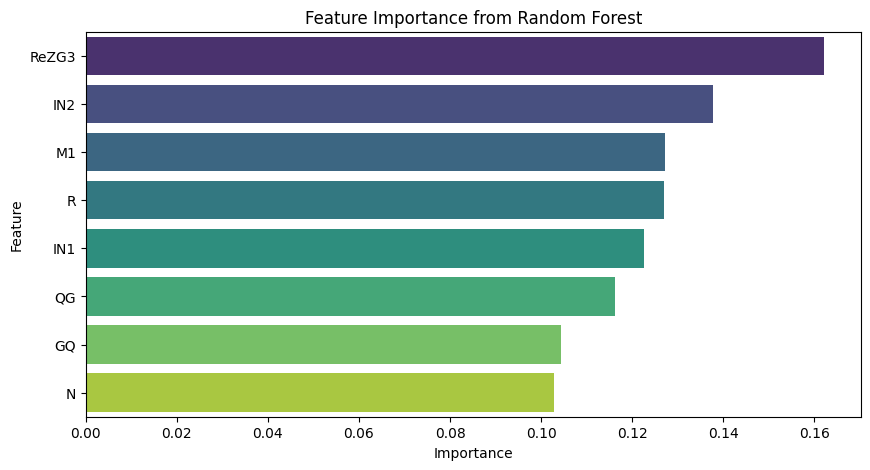

In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.show()

In [ ]:
# Apply various regression models
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression())]),
    'Support Vector Regression': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42),
    'Gaussian Process': GaussianProcessRegressor(),
    'Ridge Regression': Ridge(alpha=1.0)
}


In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {'RMSE': rmse, 'R2 Score': r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                                 RMSE   R2 Score
Linear Regression           14.372693   0.956595
Polynomial Regression       57.934724   0.294754
Support Vector Regression   74.606974  -0.169557
Decision Tree               69.232710  -0.007129
Random Forest               50.744719   0.458941
Gradient Boosting           69.184923  -0.005739
Neural Network              19.308384   0.921665
Gaussian Process           273.510139 -14.718438
Ridge Regression            16.604684   0.942067


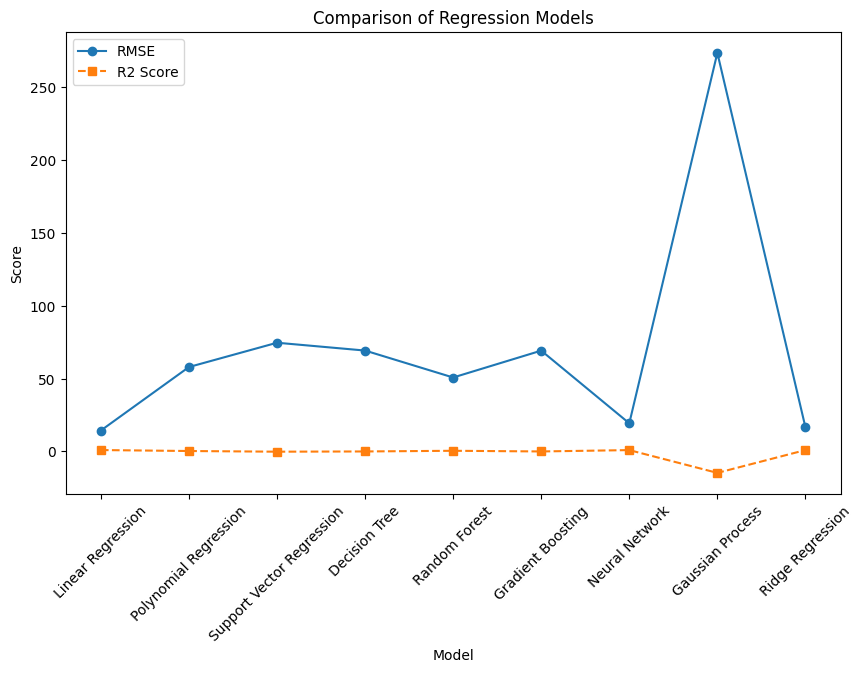

In [ ]:
# Plot Model Performance
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['RMSE'], marker='o', linestyle='-', label='RMSE')
plt.plot(results_df.index, results_df['R2 Score'], marker='s', linestyle='--', label='R2 Score')
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparison of Regression Models")
plt.legend()
plt.xticks(rotation=45)
plt.show()